## ANLY-590 Assignment 2
Jingjing Lin (JL2445)

### [1] Feedforward: Building a ReLU neural network
Consider the rectified linear activation function : hj = max(0, aj ).  

#### 1. Draw a network with:

• 2 inputs

• 1 hidden layers with 3 hidden units and a 

• 1-class output (for binary classification)

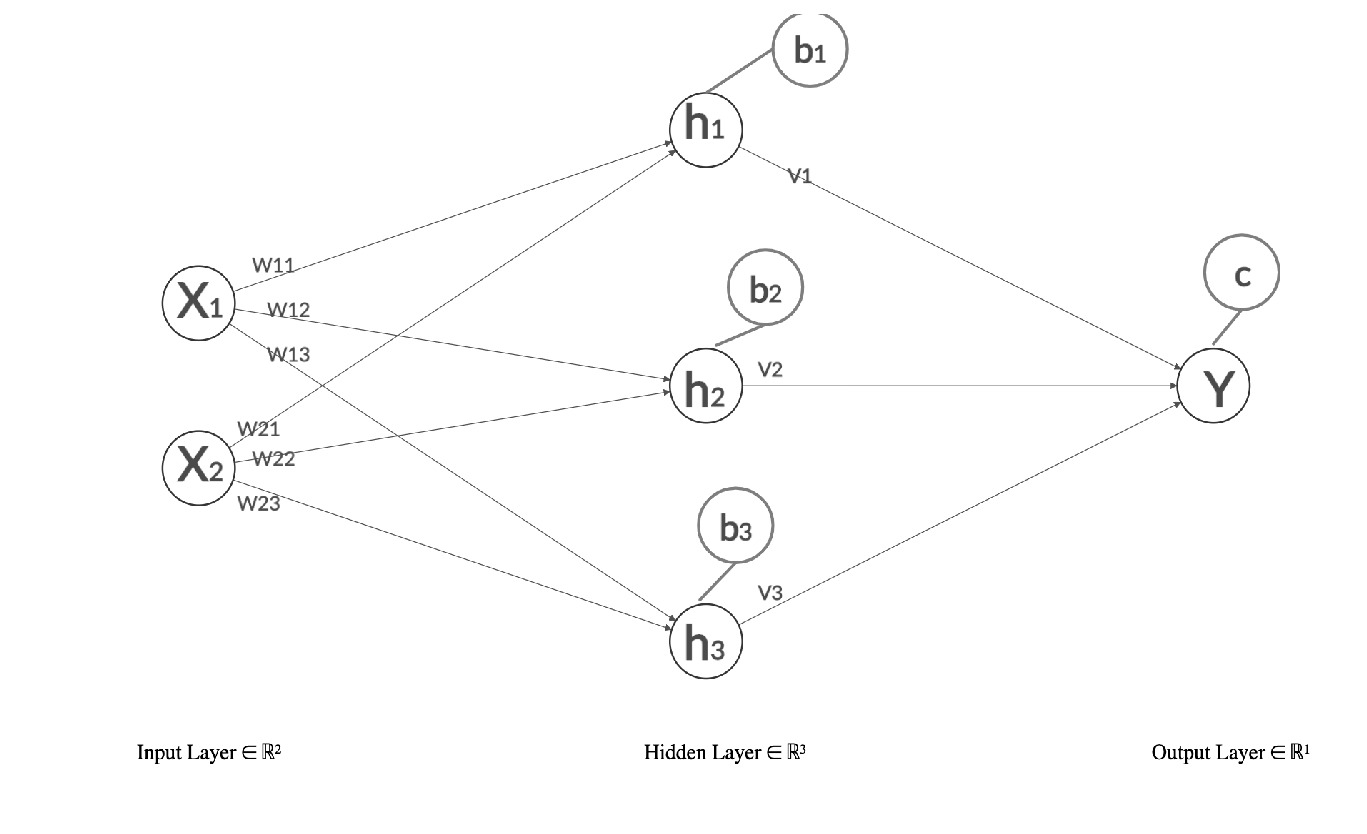

In [15]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
pic = imread('q1_nnet.png')
plt.figure(figsize = (12, 10))
plt.axis('off')
plt.imshow(pic)
plt.show()
# bias (b1, b2, b3 and c) could be zero according to different questions

#### 2. Write out the mathematical equation for the output of this network (feel free to break the input-output relationship into multiple equations).

For the hidden layer:

$h_1 = X_1w_{11} + X_2 w_{21} + b_1$

$h_2 = X_1w_{12} + X_2 w_{22} + b_2$

$h_3 = X_1w_{13} + X_2 w_{23} + b_3$

For the output:

$Y = Sigmoid \odot (ReLU \odot(h_1 v_1) + ReLU \odot(h_2 v_2) + ReLU \odot(h_3 v_3) + c)$


#### 3.Write out the forward-pass function in python, call it ff nn ReLu(...)

In [13]:
import numpy as np

In [39]:
#def sigmoid(x):
  #  return 1 / (1 + np.exp(-x))
#def ReLU(x):
   # return np.maximum(x,0)

def ff_nn_ReLU(x, weights):
    w, b, v, c= weights
    relu = np.vectorize(lambda k: np.fmax(0,k))
    sigmoid = lambda k: 1 / (1 + np.exp(-k))
    
    l1 = x.dot(w) + b
    h1 = relu(l1)
    l2 = h1.dot(v) + c
    y = sigmoid(l2)
    return h1, y



#### 4.Suppose you have the following set of weight matrices:

In [45]:
X = np.array(([1, 0, 0], [-1, -1, 1]))
W = np.array(([1, 0], [-1, 0], [0, 0.5]))
V = np.array([1, 0, -1])
b = np.array([0, 0, 1])
c = 1
weights=[W.T, b, V, c]

print ('The class probabilities associated with the forward pass of each sample are: ')
ff_nn_ReLU(X.T, weights)[-1]

The class probabilities associated with the forward pass of each sample are: 


array([0.81757448, 0.62245933, 0.37754067])

### [2] Gradient Descent

Consider a simple non-convex function of two variables:

$f(x,y)=(1−x ^3)+100∗(y^2 −x)^2$
    

$\frac{du}{dt} and \frac{d^2 u}{dx^2}$ 

\frac{du}{dt} and \frac{d^2 u}{dx^2}

#### 1.What are the partial derivatives of f with respect to x and to y?

To x:

$\frac{df}{dx} = -3 x^2 + 200x - 200 y^2$

$\frac{df}{dy} = 400y^3 - 400 xy$



#### 2.Create a visualization of the contours of this function.

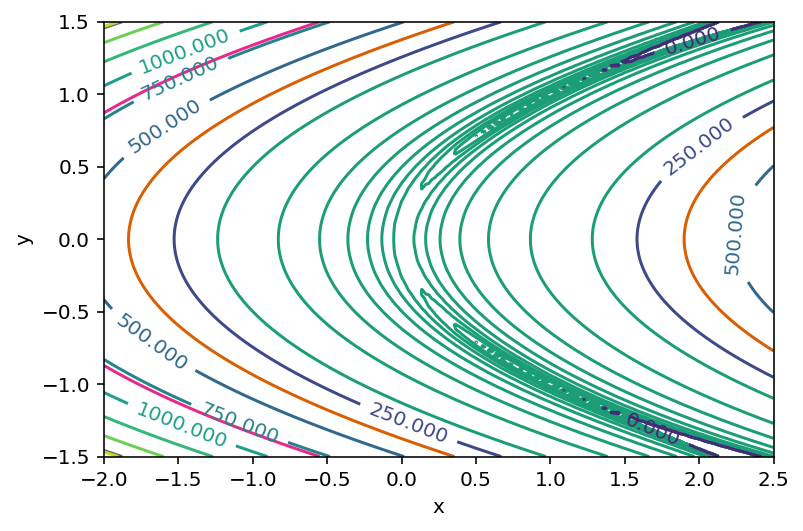

In [75]:
import warnings
warnings.filterwarnings("ignore")

func = lambda x,y: (1 - x)**3 + 100*(y**2 - x)**2
xgrid = np.linspace(-2,2.5,100)
ygrid = np.linspace(-1.5,1.5,100)
X,Y = np.meshgrid(xgrid,ygrid)
Z = func(X,Y)
plt.contour(X, Y, Z, np.logspace(-3, 3, 20, base=12),cmap='Dark2')
plt.xlabel('x')
plt.ylabel('y')
cp = plt.contour(X, Y, Z)
plt.clabel(cp,inline = True, fontsize = 10)
plt.show()


#### 3.Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few different learning rates.

In [106]:
# --- Defining gradient ----
def grad_func(vector):
    x, y = vector
    df_dx = -3 * x**2 + 200*x-200*y**2 
    df_dy = 400 * y**3 - 400*x*y
    return np.array([df_dx, df_dy])

#gradient descent
def grad_descent(starting_point = None, iterations = 20, learning_rate = 0.01):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-1, 1, size = 2)
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_func(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)


#visualize trajectory
def grad_contours(iterations, learning_rate):
    np.random.seed(923) 
    trajectory = grad_descent(iterations = iterations, learning_rate = learning_rate)
    fig, ax = plt.subplots()
    ax.contour(X, Y, Z, np.logspace(-3, 3, 20, base=10), cmap='Dark2')
    ax.set_xlim(-2,2.5)
    ax.set_ylim(-1.5,1.5)
    x = trajectory[:,0]
    y = trajectory[:,1]
    plt.title("learning rate: " + str(learning_rate))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(x,y,'-o')
    plt.show()
    

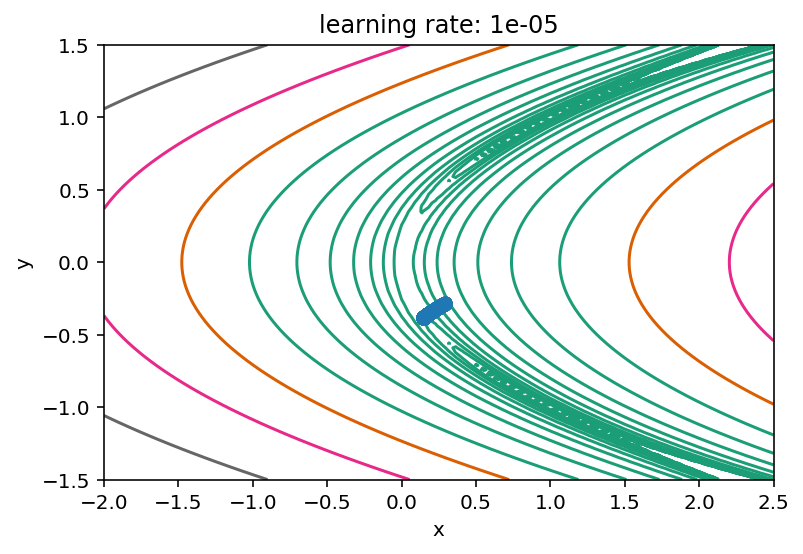

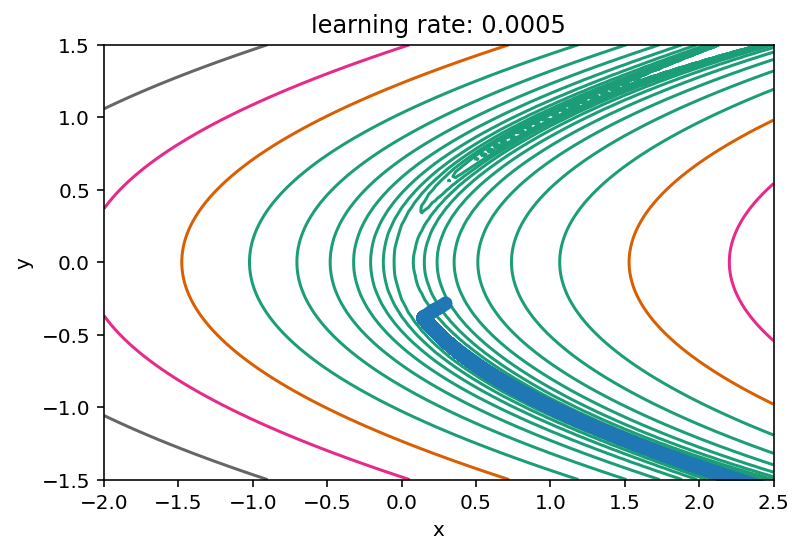

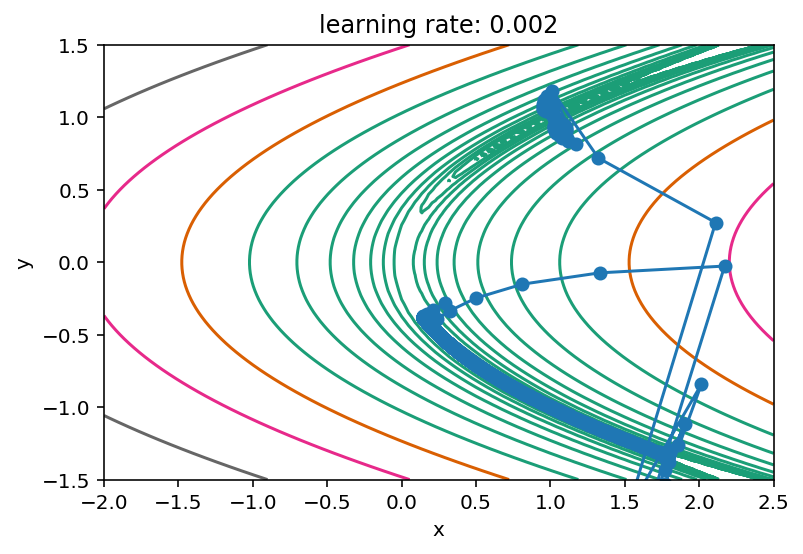

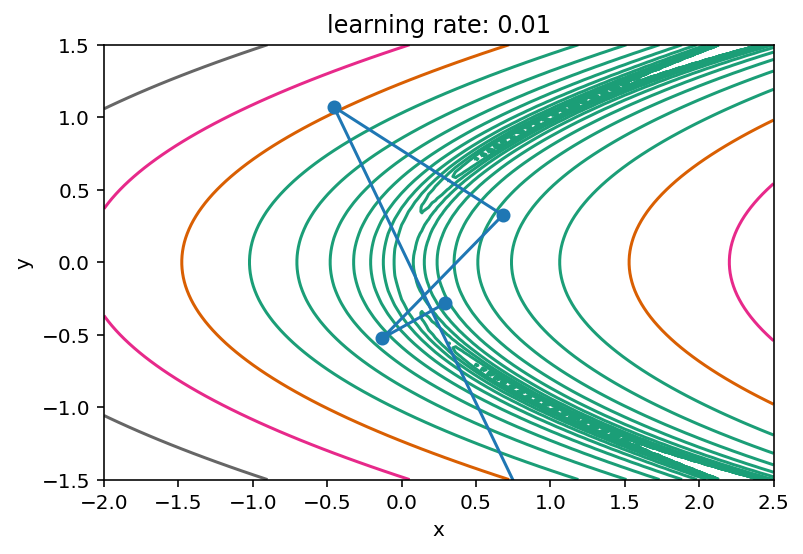

In [107]:
#test on different learning rates below
grad_contours(10000, 0.00001)
grad_contours(10000, 0.0005)
grad_contours(10000, 0.002)
grad_contours(10000, 0.01)

#### 4. Write a Gradient Descent With Momentum algorithm for finding the mini- mum. Visualize your results with a few different settings of the algorithm’s hyperparameters.

In [108]:
###Gradient Descent With Momentum algorithm

#gradient descent momentum
def gradient_descent_momentum(starting_point = None, iterations = 20, alpha = 0.5, epsilon = 10):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-1, 1, size = 2)
    trajectory = [point]
    v = np.zeros(point.size)

    for i in range(iterations):
        grad = grad_func(point)
        v = alpha * v + epsilon * grad
        point = point - v
        trajectory.append(point)            
    return np.array(trajectory)

#visualize trajectory
def gdm_contours(iterations, alpha, epsilon):
    np.random.seed(923) 
    trajectory = gradient_descent_momentum(iterations = iterations, alpha = alpha, epsilon = epsilon)    
    fig, ax = plt.subplots()
    ax.contour(X, Y, Z, np.logspace(-3, 3, 20, base=10), cmap='Dark2')
    ax.set_xlim(-2,2.5)
    ax.set_ylim(-1.5,1.5)
    x = trajectory[:,0]
    y = trajectory[:,1]    
    plt.title("alpha: " + str(alpha) + " " + "epsilon: " + str(epsilon) + " " + "iterations: " + str(iterations))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(x,y,'-o')
    plt.show()

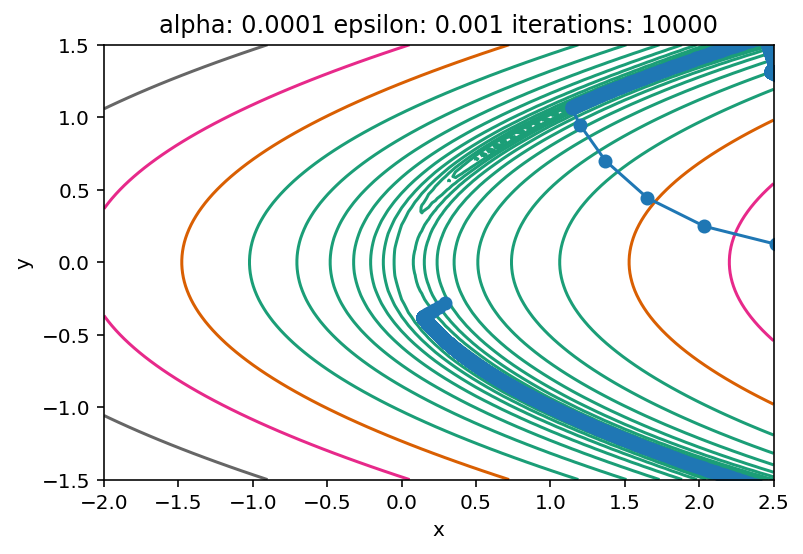

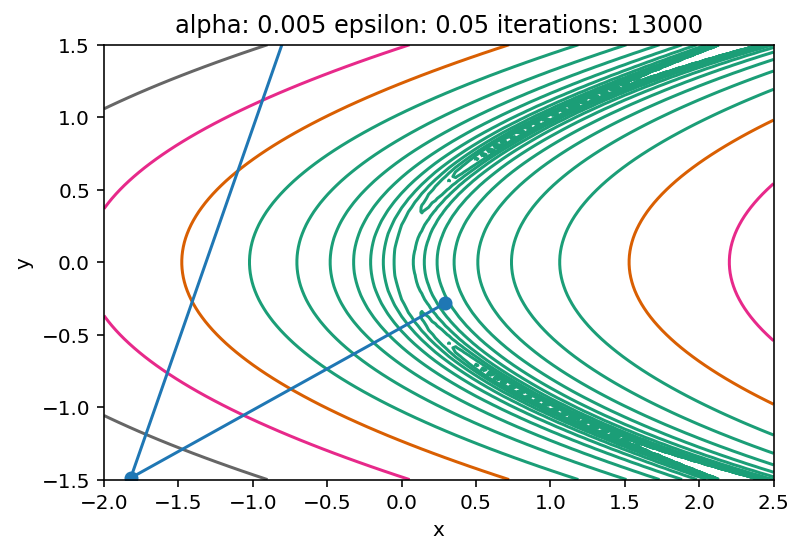

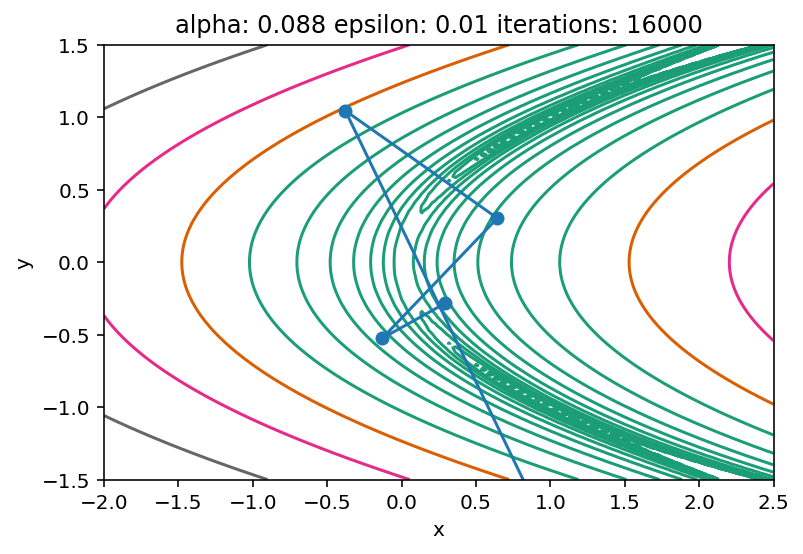

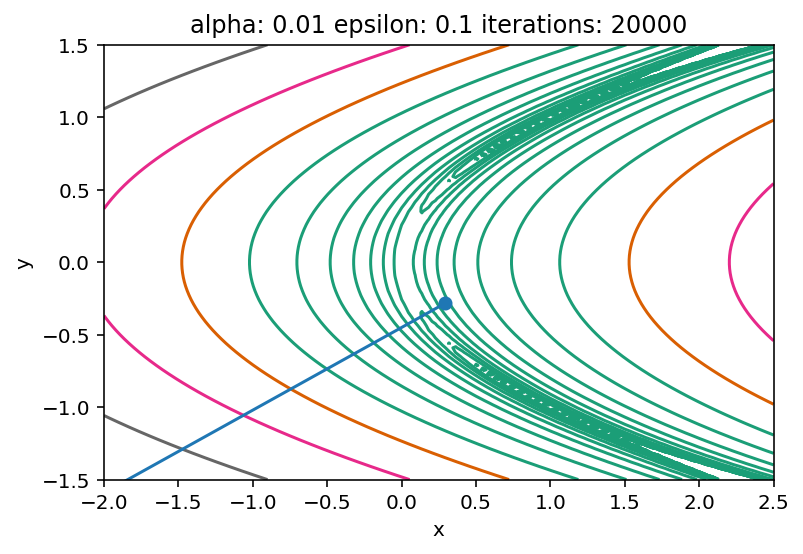

In [110]:
#test on different settings of the algorithm's hyperparameters below
gdm_contours(10000, 0.0001, 0.001)
gdm_contours(13000, 0.005, 0.05)
gdm_contours(16000, 0.088, 0.01)
gdm_contours(20000, 0.01, 0.1)

### [3] Backprop

#### 1. For the same network as in Question 1, derive expressions of the gradient of the Loss function with respect to each of the model parameters.

Since it is a classifier, the loss function we used is binary cross entropy, sigmoid

$L = -y_i \log \hat{y}_i - (1 - y_i)log(1- \hat{y}_i )$

For the $h_1, h_2, h_3$ in the hiddlen layer

$h_i = ReLU( x_1w_{1i} +x_2w_{2i} + b_i)$, i = (1,2,3)

$\hat{y} =sigmoid((\sum ^3 _ {i = 1} v_ih_i) +c )$


since:

Sigmoid: $\sigma (x) = \frac{1}{1+e^{-x}}$, $\frac{d}{dx}\sigma (x) = \sigma (x) (1-\sigma (x) )$

and:

ReLU: ReLU(x) = max(0, x), $\frac{d}{dx}(max(0,x)) = \{ ^ {0, x<0} _ {1,x>0} $


For $v_i$

$\frac{df}{d v_i} =\frac{df}{d \hat{y}}\frac{d\hat{y}}{d v_i} = (- \frac{y}{\hat{y}} + \frac{1-y}{1-\hat{y}} )\hat{y} (1-\hat{y}) h_i $

For $c$

$\frac{df}{d c} =\frac{df}{d \hat{y}}\frac{d\hat{y}}{d c} = (- \frac{y}{\hat{y}} + \frac{1-y}{1-\hat{y}} )\hat{y} (1-\hat{y})$


For $w_{ij}$
$\frac{df}{d w_{ij}} =\frac{df}{d \hat{y}}\frac{d\hat{y}}{d h}\frac{d h}{d w} = (- \frac{y}{\hat{y}} + \frac{1-y}{1-\hat{y}} )\hat{y} (1-\hat{y}) v_{ij}x_i, when (x_1w_{1i} +x_2w_{2i} + b_i) >0 $

else,

$\frac{df}{d w_{ij}} = 0 $


For $b_i$

$\frac{df}{d w_{ij}} =\frac{df}{d \hat{y}}\frac{d\hat{y}}{d h}\frac{d h}{d b_i} = (- \frac{y}{\hat{y}} + \frac{1-y}{1-\hat{y}} )\hat{y} (1-\hat{y}) v_{ij}, when (x_1w_{1i} +x_2w_{2i} + b_i) >0 $


else,

$\frac{df}{d b_i} = 0 $


#### 2. Write a function grad f(...) that takes in a weights vector and returns the gradient of the Loss at that location.


In [151]:
import pandas as pd

def relu_derivative(x):
    return np.where(x>0, 1, 0)
def g_loss(y,yhat):
    return -y/yhat+(1-y)/(1-yhat)
def g_sigmoid(s):
    return s*(1-s)
def sigmoid(vector):
    return 1/(1+np.exp(-vector))
def cross_entropy_loss(y, y_hat):
    tot = y * np.log(y_hat)
def loss_function(y, y_pred):
    total = y * np.log(y_pred)+(1-y)*np.log(1-y_pred) # Binary cross entropy
    return -total.sum()

def grad_f(y,x,v,b,c,w):
    h1 = relu_derivative(x.dot(w)+b)
    yhat = sigmoid(h1.dot(v)+c)
    dv = g_loss(y,yhat)*g_sigmoid(yhat)*h1
    dc = g_loss(y,yhat)*g_sigmoid(yhat)
    #partialw = grad_loss(y,yhat)*grad_sigmoid(yhat)*v*x
    #partialb = grad_loss(y,yhat)*grad_sigmoid(yhat)*v
    a = x.dot(w)+b
    dw = np.zeros(shape=(3,2))
    db = np.zeros(shape=(3,1))
    for j in range(len(a)):
            if a[j]<0:
                dw[j][0] = 0
                dw[j][1] = 0
                db[j] = 0
                continue
            else:
                dw[j] = g_loss(y,yhat)*g_sigmoid(yhat)*v[j]*x
                db[j] = g_loss(y,yhat)*g_sigmoid(yhat)*v[j]

    return (dv,dc,dw,db)

In [137]:
W = np.array([[1,-1,0],[0,0,0.5]])
b = np.array([0,0,1])
V = np.array([1,0,-1])
c = np.array([1])
X = np.array([1,-1])
dv,dc,dw,db = grad_f(1,X,V,b,c,W)
dv,dc,dw,db

(array([-0.26894142, -0.        , -0.26894142]),
 array([-0.26894142]),
 array([[-0.26894142,  0.26894142],
        [ 0.        ,  0.        ],
        [ 0.26894142, -0.26894142]]),
 array([[-0.26894142],
        [ 0.        ],
        [ 0.26894142]]))

#### 3. Generate a synthetic dataset like the XOR pattern (see below).

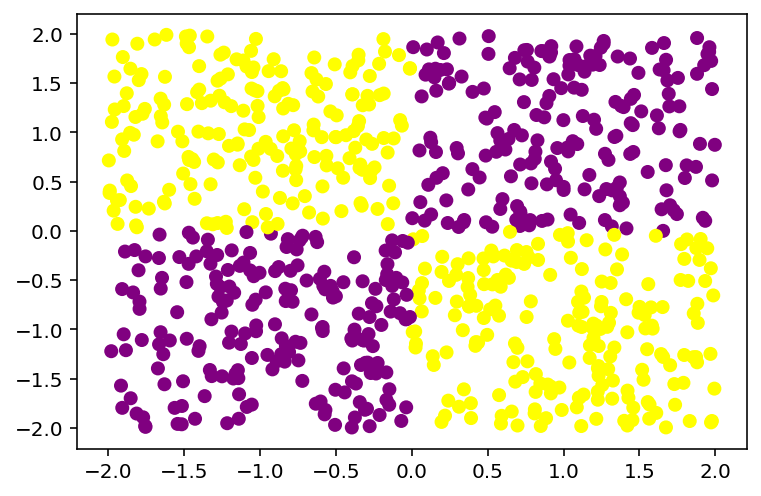

In [138]:
N = 800 
np.random.seed(923)
ran = np.random.uniform(-2,2,size = N *2 ).reshape(N,2)
z = []
for i in range(N):
    if ran[i][0]*ran[i][1]<0:
        z.append('yellow')
    else:
        z.append('purple')
plt.scatter(ran[:,0],ran[:,1],color = z)

#### 4. Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result.

In [175]:
def loss_function(y, y_pred):
    total = y * np.log(y_pred)+(1-y)*np.log(1-y_pred) # Binary cross entropy
    return -total.sum()

def relu_derivative(x):
    return np.where(x>0, 1, 0)

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def loss_bias():
    np.random.seed(923)
    W = np.random.randn(6).reshape(2,3)
    V = np.random.randn(3).reshape(3,1)
    b = np.random.randn(3).reshape(1,3)
    b_y = np.random.randn(1)
    return (W, V, b, b_y)

def y_predict(x, params):
    W, V, b, b_y = params
    h = ReLU(np.dot(x, W) + b)
    y = sigmoid(np.dot(h, V) + b_y) # binary classification
    return y

def grad_f1(x, y, params):
    W, V, b, b_y = params
    a = np.dot(x, W) + b
    h = ReLU(a)
    y_hat = sigmoid(np.dot(h, V) + b_y)
    
    dL_dby = (y_hat-y).sum()
    dL_dv = h.T.dot(y_hat-y)
    dL_db =((y_hat-y).dot(V.T)*relu_derivative(a)).sum(axis=0)
    dL_dw = x.T.dot((y_hat-y).dot(V.T)*relu_derivative(a))
    return (dL_dw, dL_dv, dL_db, dL_dby)

x = np.random.uniform(low=-2,high=2,size=1600).reshape((800,2))
y = np.zeros((800,1))

In [211]:
def grad_descent_xor(x, y, starting_point=None, iterations=50, learning_rate=0.001):
    point = starting_point
    trajectory = [point]
    losses = [loss_function(y, y_predict(x, point))]
    
    for i in range(iterations):
        grads = grad_f1(x, y, point)
        update = []
        for (matrix, grad) in zip(point, grads):
            update.append(matrix - learning_rate*grad)
        point = tuple(update)
        trajectory.append(point)
        losses.append(loss_function(y, y_predict(x, point)))
    return (np.array(trajectory), losses)

In [222]:
traj, losses = grad_descent_xor(x, y, starting_point=loss_bias(), iterations=50, learning_rate=0.00088)

Text(0, 0.5, 'Total Loss')

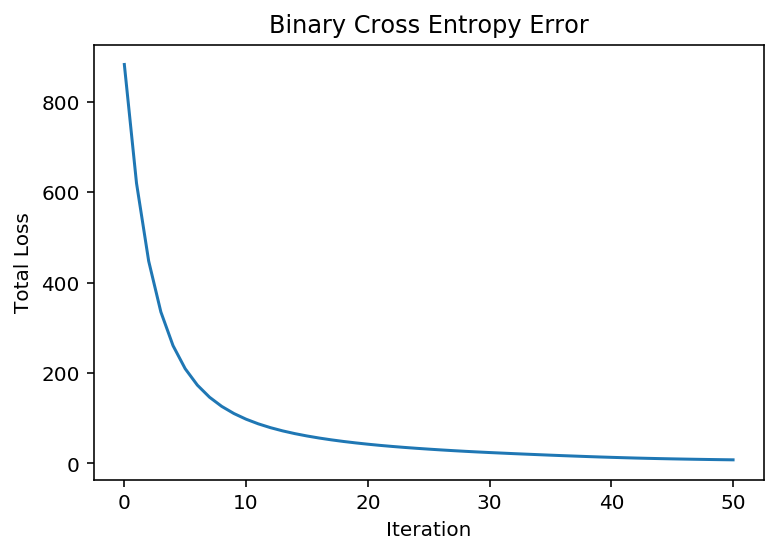

In [223]:
# plotting the trends
plt.plot(losses)
plt.title('Binary Cross Entropy Error')
plt.xlabel('Iteration')
plt.ylabel('Total Loss')

#### 5. Repeat the exercise above using Momentum. Comment on whether your algorithm seems to converge more efficiently.

In [325]:
#function to computer gradient descent with momentum
def grad_momentum_xor(x, y, starting_point, iterations=50, epsilon=1e-1, alpha=0.0005):
    point = starting_point 
    trajectory = [point]
    losses = [loss_function(y, y_predict(x, point))]
    vs = np.zeros(len(starting_point))
    
    for i in range(iterations):
        grads = grad_f1(x,y,point)
        update = []  
        for (matrix, grad, v) in zip(point, grads, vs):
            update.append(matrix - epsilon*grad-alpha*v)
        
        vs = grads
        point = tuple(update)
        trajectory.append(point)
        losses.append(loss_function(y, y_predict(x, point)))
        
    return (np.array(trajectory), losses)

In [330]:

# fit in the network to gradient descent with momentum
traj_momentum, losses_momentum = grad_momentum_xor(x, y, starting_point=randomized_weights_bias(), iterations=50, epsilon=0.001, alpha=0.0005)

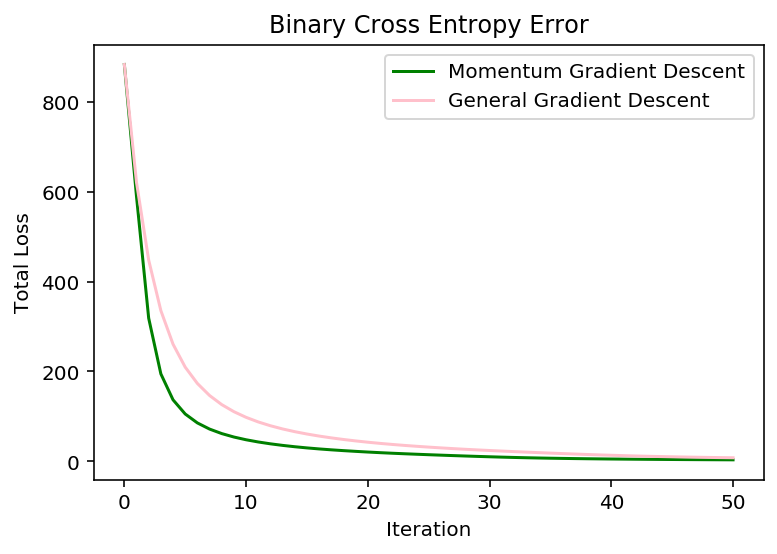

In [331]:
#plot the trends comparison 
plt.plot(losses_momentum, label = "Momentum Gradient Descent", color ="green")
plt.plot(losses, label = "General Gradient Descent", color = "pink")

plt.title('Binary Cross Entropy Error')
plt.xlabel('Iteration')
plt.ylabel('Total Loss')
plt.legend(loc = "upper right")

As you could see from the graph above, the one with momentum has a better perfoamnce (less loss) in fewer iteration times.

#### 6.Plot a visualization of the final decision boundary that your model has learned. Overlay the datapoints in this plot.


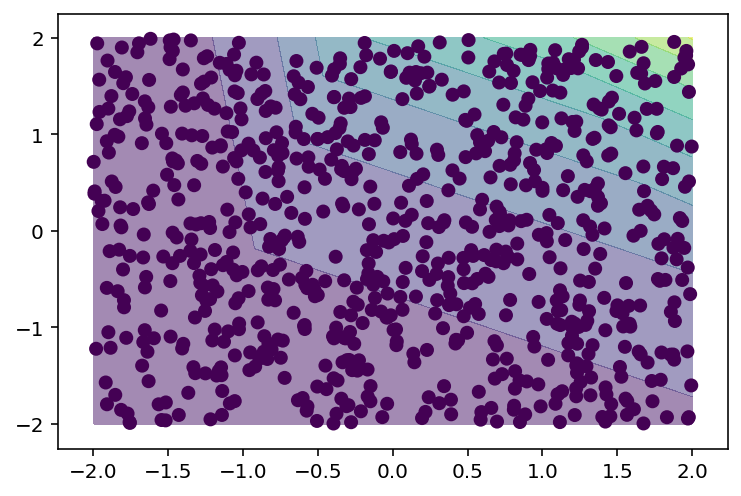

In [332]:
x_span = np.linspace(-2, 2, 1600)
y_span = np.linspace(-2, 2, 1600)
xx, yy = np.meshgrid(x_span, y_span)
labels = y_predict(np.c_[xx.ravel(), yy.ravel()], traj[-1])
z = labels.reshape(xx.shape)
fig, ax = plt.subplots()
ax.contourf(xx, yy, z, alpha=0.5)
# Get predicted labels on training data and plot
ax.scatter(x[:,0],x[:,1], c=y[:,0], lw=1)
plt.show()